# Predicting disaster in the Titanic

First we import the csv files (train- csv file we will use to train and possibly test our model to get an ideal of the model accuracy. test - csv file that we want to predict who survived based on the information given) using pandas dataframe.
For enthusiasts, get more information about the pandas dataframe here https://pandas.pydata.org/ 

In [32]:
#you can import pandas as anything you want to call it but most programmers actually call it pd
#import from the path in which you saved the files, mine is in same folder with my notebook
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#we use .head() to sample the first 5 rows of the dataframe. So lets check the train dataframe
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now lets check out the information of the columns in each dataframe.describe() is one good way for analyzing each column but .describe() omits columns with textual entry(strings), so we use .info() for a good overview since we have various columns with textual entry. 

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We noticed we have 12 columns with 2 64-bit float type, 5 64-bit integer type and 5 object(textual) type. Most importantly we have 891 entries per column and it is noticed that some columns like Age, Cabin and Embarked contain null(empty) values. We need to take care of  that, and we will do that soon. So lets analyze the test sample.

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Analyzing the test sample same way we notice the cabin, fare and Age has some null values. Lets start analyzing each column with null value, this are Cabin, Embarked, Fare and Age

In [33]:
#so lets look at cabin and see the type of values
#to make sure we perform both data cleaning and feature engineering operations in both test and train
#dataframe we create we will creat a list called combo that contain both and iterate through them
combo = [df_train, df_test]
for x in combo:
    for y in x['Cabin']:
        print(y)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

Alot of nan values as expected with some cabin values. The column right now is quite useless cause each cabin is different, so lets not waste this column, we should extract the deck (first letter) of each Cabin

In [34]:
Cabin_deck = []
for x in combo:
    index = 0
    for y in x['Cabin']:
        y = str(y)[0]
        x.loc[index, 'Cabin_deck'] = y
        index += 1
        if y not in Cabin_deck:
            Cabin_deck.append(y)
Cabin_deck

['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


So now the Cabin_deck column have no nan instead it has n, so we can use the Cabin_deck column and let go of cabin, we will drop it later. Embarked contain few nans just in the df_train set, so lets plot at a pie chark to see the distributions of the various embarked. We will use matplotlib.pyplot library, you can get information about it here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

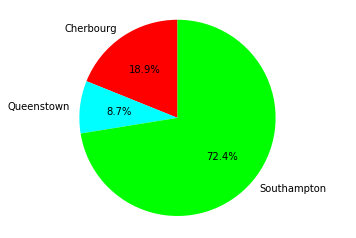

In [7]:
import matplotlib.pyplot as plt

labels="Cherbourg","Queenstown","Southampton"
sizes=[sum(df_train["Embarked"]=="C"),sum(df_train["Embarked"]=="Q"),sum(df_train["Embarked"]=="S")]
colors=["red","aqua","lime"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
 
plt.axis('equal')
plt.show()

So now we have two options with Embarked nan values, to either change them to S - southampton, which won't make much difference since it has large percentage of the embarked entry or drop them, since the data which we want to test(df_test) has no nan value for embarked. We will take care of it later

So lets deal with fare. Its noticed fare has nan values just in the test set, so lets look at the relationship between fare and survived to know if its really important using seaborn swarmplot and plotting with matplotlib.pyplot. You can read more about seaborn here https://seaborn.pydata.org/ and their swarmplot here https://seaborn.pydata.org/generated/seaborn.swarmplot.html

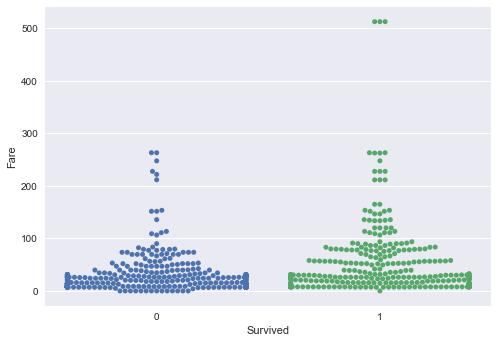

In [8]:
import seaborn as sns

sns.swarmplot(x='Survived', y='Fare', data=df_train);
plt.show()

Looking at the plot the fare does not seems like it matters much, the distribution in the survived and not survived seems the same. So we can either drop the full column in both df_train and df_test or replace the nan value in df_test with the median; we will not replace with mean because of the effect of outliers.

In [35]:
#so let me replace with the median, its easy with numpy
import numpy as np

df_test['Fare'][np.isnan(df_test['Fare'])] = df_test['Fare'].median()


C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


So lets deal with age by visualizing using seaborn distplot, we will have to drop the nan values, that is what the dropna() is for.

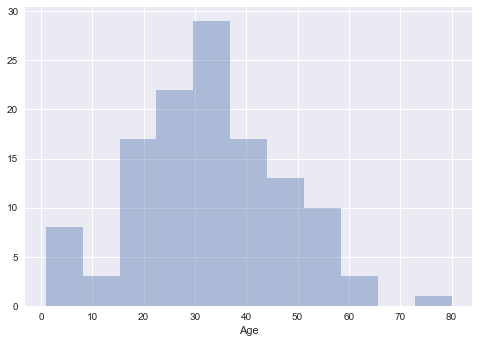

In [12]:
sns.distplot(df_train.dropna()['Age'][df_train['Survived'] == 1], kde=False);
plt.show()

This shows that people who where around the age of 30 survived the most, so its clear age is still important. So lets just assign the null value in the age column the median age

In [36]:
for x in combo:
    x['Age'][np.isnan(x['Age'])] = x['Age'].median()

C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


The name column seems useless cause they isn't really any relationship between the name column and survival. But we can make use of the titiles by extracting them, so lets create a new column named Title with all the different titles.

In [37]:
title_name = []

for x in combo:
    index = 0
    for y in x['Name']:
        title = y.split(',')[1].split('.')[0]
        x.loc[index, 'Title'] = title
        index += 1
        if title not in title_name:
            title_name.append(title)
title_name

[' Mr',
 ' Mrs',
 ' Miss',
 ' Master',
 ' Don',
 ' Rev',
 ' Dr',
 ' Mme',
 ' Ms',
 ' Major',
 ' Lady',
 ' Sir',
 ' Mlle',
 ' Col',
 ' Capt',
 ' the Countess',
 ' Jonkheer',
 ' Dona']

If you aren't really familiar with python, let me explain the code above. We iterate through the combo list which contain df_train and df_test. Then we iterate through the column name in the dataframe. For each name, since they have similar patterns (Braund, Mr. Owen Harris = surname, title. other names). We use the .split()(this function return a list from a string, with a particular delimeter, here we use ','). Doing that gives [surname, title.othernames], so we pick 'index 1' containing 'title.othernames' ,and use the split function again with '.' delimetter and pick the title at index 0 and store in a variable title. After this we create a column Title and put in each value of the variable title.  

So lets use seaborn factorplot to see the relationships between each title and the possiblity of surviving

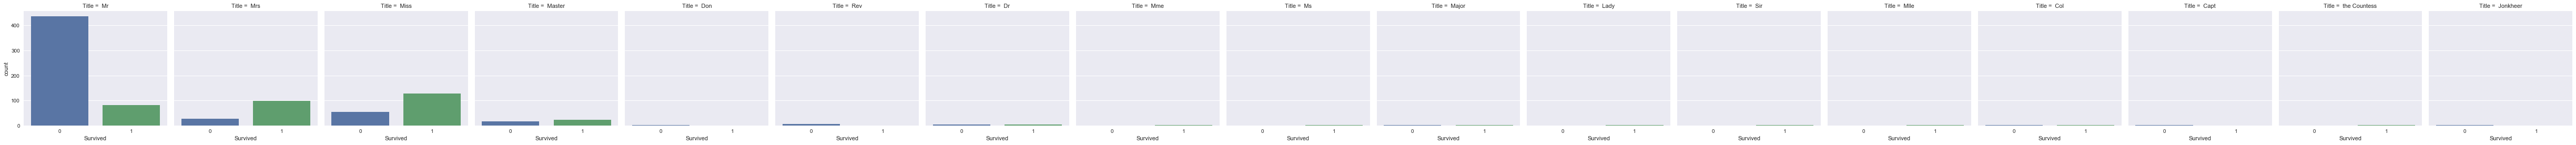

In [15]:
import matplotlib.pyplot as plt

sns.factorplot(x='Survived', col='Title', kind='count', data=df_train);
plt.show()

I am going to share the titles into three categories namely the high, medium and low with the information given above.
**Survival probability** = no of title holders who survived / Total number of title holders  
high - These are people who have high survival probability (Mrs, Miss, Mme, Ms, Lady, Sir, Mile, the Countess)
medium - These are people who have medium survival probability (Master, Dr, Major, Col)
low - These are people with low survival probability (Mr, Don, Rev, Capt, Jonkheer)

I am also assigning numerical value to all other useful categorical data

In [38]:
tit = {' Mr': 0, ' Don': 0, ' Rev': 0, ' Capt': 0, ' Jonkheer': 0, ' Master': 1, ' Dr': 1, ' Major': 1,
       ' Col': 1, ' Mrs': 2, ' Miss': 2, ' Mme': 2, ' Ms': 2, ' Lady': 2, ' Sir': 2, ' Mile': 2, 
       ' the Countess': 2}

cab_dec = {'n': 0, 'C': 1, 'E': 2, 'G': 3, 'D': 4, 'A': 5, 'B': 6, 'F': 7, 'T': 8}

sex = {'female': 0, 'male': 1}

embarked = {'Q': 0, 'C': 1, 'S': 2}

for x in combo:
    x['Title'] = x['Title'].map(tit)
    x['Cabin_deck'] = x['Cabin_deck'].map(cab_dec)
    x['Sex'] = x['Sex'].map(sex)
    x['Embarked'] = x['Embarked'].map(embarked)
    
#ticket number isn't really useful so we will churn it. Also we have taken the useful information from
#name and cabin so we will churn them too

In [17]:
#so lets check if all went well
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,1,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0,0,0.0


All went well so we can actually drop Name, Cabin and Ticket which aren't useful

In [39]:
df_test = df_test.drop(['Name', 'Cabin', 'Ticket'],axis = 1)
df_train = df_train.drop(['Name', 'Cabin', 'Ticket'],axis = 1)

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title
0,1,0,3,1,22.0,1,0,7.2500,2.0,0,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0,1,2.0
2,3,1,3,0,26.0,0,0,7.9250,2.0,0,2.0
3,4,1,1,0,35.0,1,0,53.1000,2.0,1,2.0
4,5,0,3,1,35.0,0,0,8.0500,2.0,0,0.0


So now lets confirm if all null value has been eliminated. Since we have only numerical values we can make use of the describe function which also gives you other interesting informations about each column.

In [20]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.637795,0.811448,0.759280
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.636157,1.815143,0.941107
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,8.000000,2.000000


In [21]:
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535,1.535885,0.734450,0.781775
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516,1.750316,0.947087
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000,0.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,7.000000,2.000000


Everything seems good but we have some null Title and Embarked(we already know), so lets look at the null column

In [22]:
df_train.loc[(df_train['Title'].isnull())| (df_train['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title
61,62,1,1,0,38.0,0,0,80.0000,NaN,6,2.0
641,642,1,1,0,24.0,0,0,69.3000,1.0,6,NaN
710,711,1,1,0,24.0,0,0,49.5042,1.0,1,NaN
829,830,1,1,0,62.0,0,0,80.0000,NaN,6,2.0


In [23]:
df_test.loc[(df_test['Title'].isnull())]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title
414,1306,1,0,39.0,0,0,108.9,1,1,NaN


Since they are all females I will assign a value of 2(high survival probability) to them. For embarked we replace all null with 'S' which is 2 also

In [40]:
df_train['Title'][df_train['Title'].isnull()] = 2
df_train['Embarked'][df_train['Embarked'].isnull()] = 2
df_test['Title'][df_test['Title'].isnull()] = 2


C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [25]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.638608,0.811448,0.762065
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,1.815143,0.941883
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,8.000000,2.000000


In [26]:
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535,1.535885,0.734450,0.784689
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.685516,1.750316,0.947826
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000,0.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,7.000000,2.000000


So lets create another feature, isalone. This feature will determine if the passenger was alone or with family members. With this feature we can eliminate 'SibSp' -which is for number of siblings onboard- and 'Parch' which is for guardian onboard. To do this we will first create a new column FamilySize and assign 0 to isalone if the familysize is greater than 1

In [41]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = 1
df_train['IsAlone'].loc[df_train['FamilySize'] > 1] = 0

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = 1
df_test['IsAlone'].loc[df_test['FamilySize'] > 1] = 0

C:\Users\JOSEPHINE\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_deck,Title,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.638608,0.811448,0.762065,1.904602,0.602694
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673,1.815143,0.941883,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,2.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,8.000000,2.000000,11.000000,1.000000


We are good to go. We have all numerical values with no nan. So lets look at corellation coeficient of each column and determine which are important to predict the survival. We are going to use the seaborn heatmap. Information about heatmap can be found https://seaborn.pydata.org/generated/seaborn.heatmap.html 

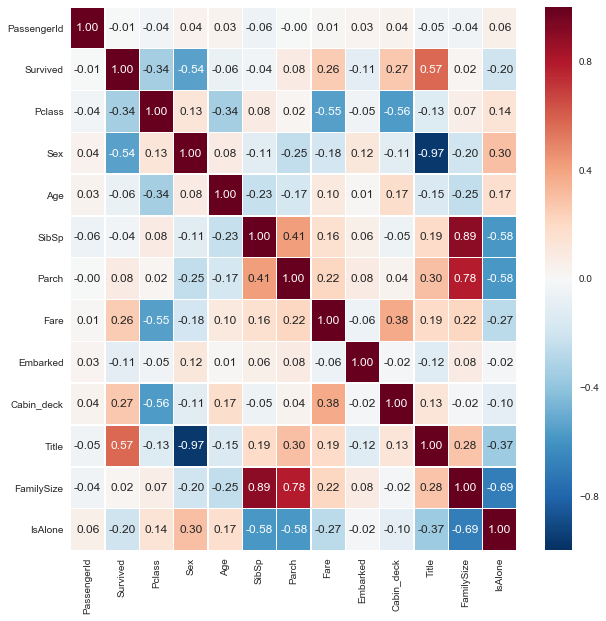

In [29]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

Wow! our new column title is the most important feature to predict survived with corellation coefficient of 0.57. So now you see the important of feature engineering. Another important feature is the Sex. We can see the passenger ID is irrelevant with a low correlation coefficient. So we will drop it along with SibSp, FamilySize and Parch and create a numpy array of features and labels using '.values'

In [42]:
features = df_train.drop(['PassengerId', 'Survived', 'Parch', 'FamilySize', 'SibSp'], axis = 1).values
labels = df_train['Survived'].values

passenger_ID = df_test['PassengerId']
df_test_drop = df_test.drop(['PassengerId', 'Parch', 'FamilySize', 'SibSp'], axis = 1).values
features

array([[ 3.,  1., 22., ...,  0.,  0.,  0.],
       [ 1.,  0., 38., ...,  1.,  2.,  0.],
       [ 3.,  0., 26., ...,  0.,  2.,  1.],
       ...,
       [ 3.,  0., 28., ...,  0.,  2.,  0.],
       [ 1.,  1., 26., ...,  1.,  0.,  1.],
       [ 3.,  1., 32., ...,  0.,  0.,  1.]])

Now we are going to normalize the features amd df_test. Decision trees actually do not need to be normalized but other models like Knn and Svm need to be normalized so lets just normalize them. Information about StandardScaler http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

In [43]:
#StandardScaler is used for every normalization except NaiveBayes which use MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#df_test = df_test.values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_test_scaled = scaler.fit_transform(df_test_drop)

features_scaled

array([[ 0.82737724,  0.73769513, -0.56573646, ..., -0.44729447,
        -0.8095412 , -1.2316449 ],
       [-1.56610693, -1.35557354,  0.66386103, ...,  0.10393564,
         1.31505736, -1.2316449 ],
       [ 0.82737724, -1.35557354, -0.25833709, ..., -0.44729447,
         1.31505736,  0.81192233],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ..., -0.44729447,
         1.31505736, -1.2316449 ],
       [-1.56610693,  0.73769513, -0.25833709, ...,  0.10393564,
        -0.8095412 ,  0.81192233],
       [ 0.82737724,  0.73769513,  0.20276197, ..., -0.44729447,
        -0.8095412 ,  0.81192233]])

Now I am going to create the confusion matrix model to point out false positve and false negative

In [44]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_model(model_used):
    cm=confusion_matrix(labels_test,model_used.predict(features_test))
    col=["Predicted Not Churn","Predicted Churn"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Not Churn","Predicted Churn"]
    cm.index=["Actual Not Churn","Actual Churn"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

# Prediction
I am going to use different model to test for accuracy using cross_val_score and use the best model to predict for df_test_scaled. I will also split the training data (features and labels) into test and train samples

In [45]:
from sklearn.model_selection import train_test_split

(features_train, features_test, labels_train, labels_test) = train_test_split(features_scaled, labels, test_size= 0.25, random_state = 1)


For decisiontrees I will actually visualize it to see the depth of the trees and how complex the decision the models take are

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set

cv_scores = cross_val_score(clf, features_scaled, labels, cv=5)
clf.fit(features_train, labels_train)
print(cv_scores)
print(cv_scores.mean())

confusion_matrix_model(clf)

[0.77094972 0.78212291 0.82022472 0.7752809  0.82485876]
0.7946874001475998


,Predicted Not Churn,Predicted Churn
Actual Not Churn,0.86,0.14
Actual Churn,0.35,0.65


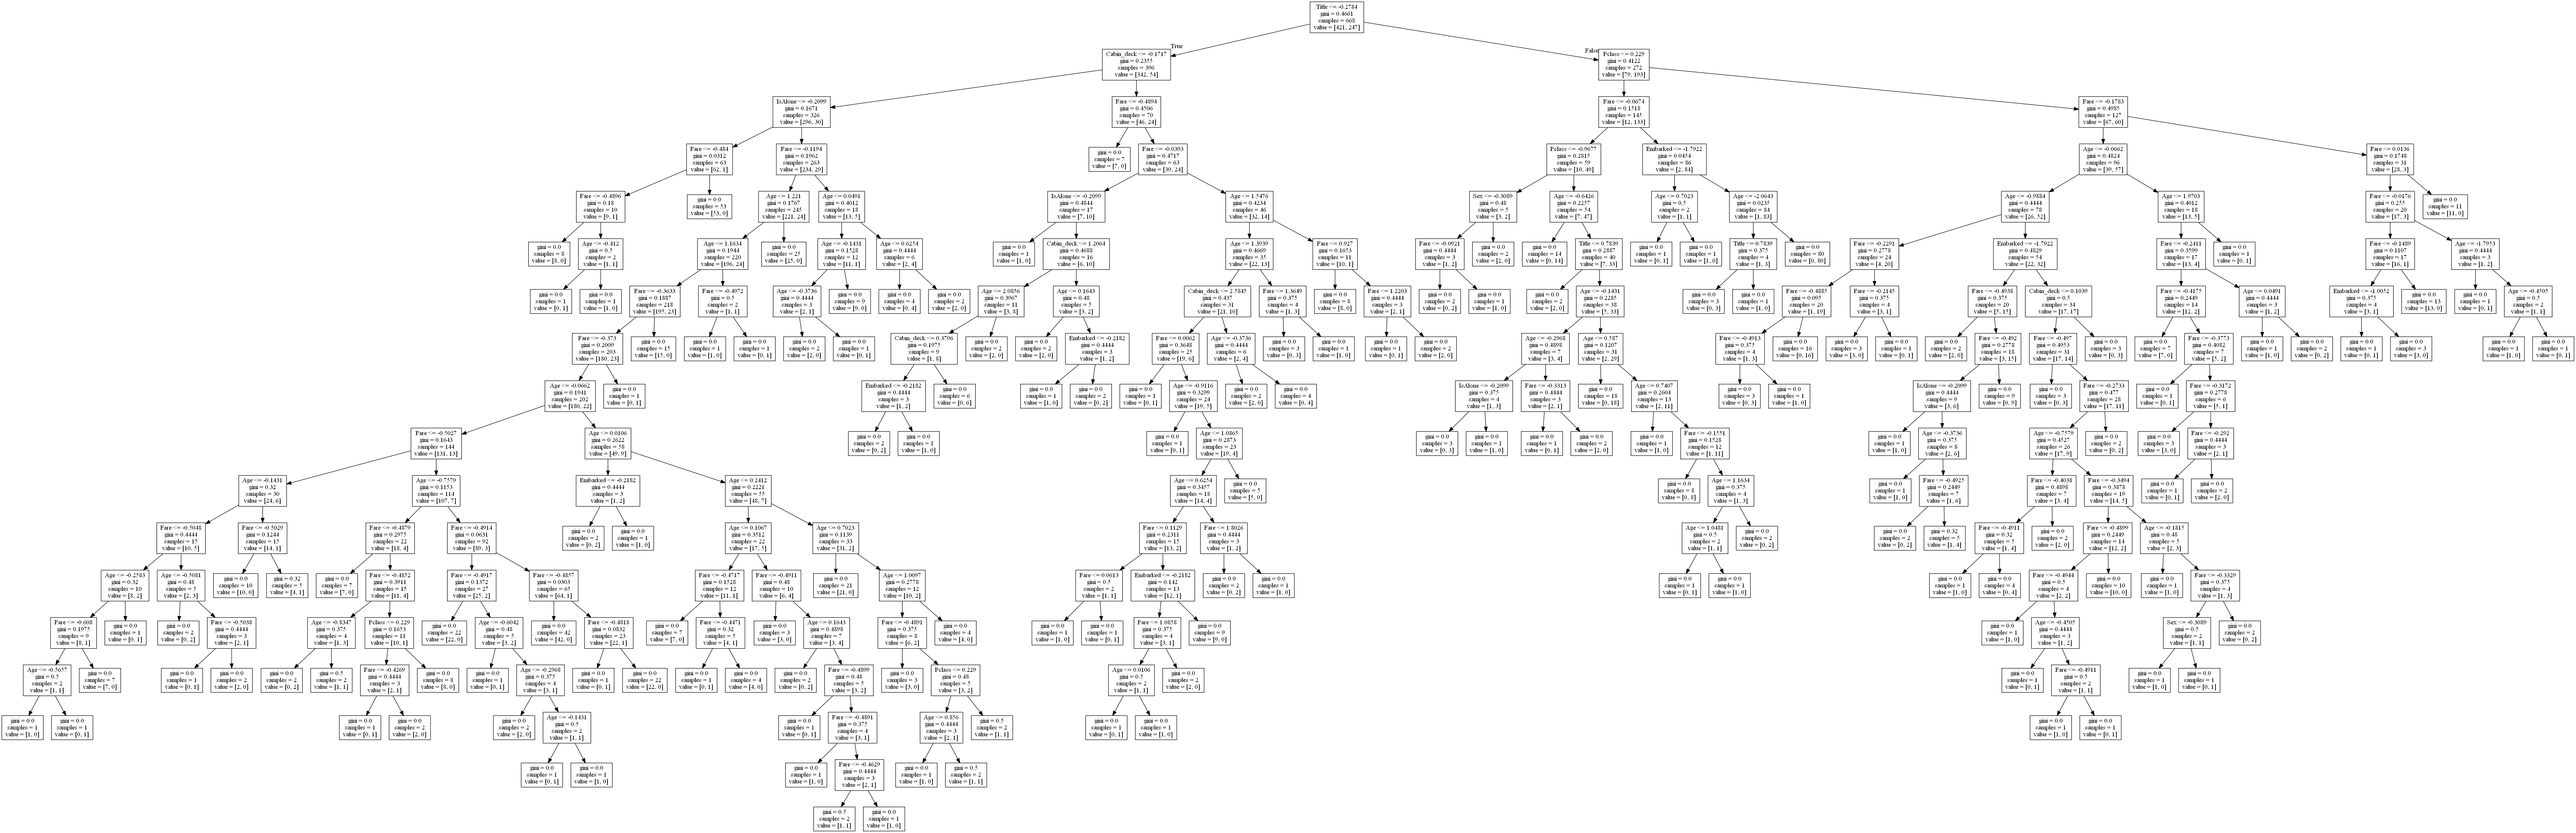

In [47]:
#0.79 not that bad so lets visualize what actually happened
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data

feature_names = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_deck', 'Title', 'IsAlone']

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

You can see how complex it is.

In [73]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=1.0)

cv_scores = cross_val_score(clf, features_scaled, labels, cv=5)

print(cv_scores)
print(cv_scores.mean())
clf.fit(features_scaled, labels)
confusion_matrix_model(clf)

[ 0.79888268  0.82122905  0.8258427   0.80337079  0.83615819]
0.817096681416


,Predicted Not Churn,Predicted Churn
Actual Not Churn,0.94,0.06
Actual Churn,0.40,0.60


In [74]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth = 4, random_state=0)
cv_scores = cross_val_score(clf, features_scaled, labels, cv=10)

print(cv_scores)
print (cv_scores.mean())
clf.fit(features, labels)
confusion_matrix_model(clf)

[ 0.82222222  0.83333333  0.7752809   0.87640449  0.83146067  0.78651685
  0.83146067  0.80898876  0.85393258  0.81818182]
0.823778231756


,Predicted Not Churn,Predicted Churn
Actual Not Churn,0.87,0.13
Actual Churn,0.33,0.67


In [75]:
from sklearn.naive_bayes import MultinomialNB

scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(features)

clf = MultinomialNB()
cross_val_score(clf, features_minmax, labels, cv=5).mean()

0.79458033532319994

In [76]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
print (cross_val_score(clf, features_scaled, labels, cv=10).mean())
clf.fit(features_train, labels_train)
confusion_matrix_model(clf)

0.801267449779


,Predicted Not Churn,Predicted Churn
Actual Not Churn,0.83,0.17
Actual Churn,0.26,0.74


In [78]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier ( n_estimators= 50, learning_rate = 0.15)

cv_scores = cross_val_score(clf, features_scaled, labels, cv=10)

print(cv_scores)
print (cv_scores.mean())
clf.fit(features_train, labels_train)
confusion_matrix_model(clf)

[ 0.82222222  0.8         0.76404494  0.87640449  0.80898876  0.78651685
  0.78651685  0.78651685  0.83146067  0.80681818]
0.806948984224


,Predicted Not Churn,Predicted Churn
Actual Not Churn,0.85,0.15
Actual Churn,0.26,0.74


In [35]:
pred = clf.predict(df_test_scaled)
submission=pd.DataFrame({"PassengerId": passenger_ID, "Survived": pred})
submission

In [36]:
submission.to_csv("solnx.csv",index=False)

So we see random forest is the best here. Pls comment on any inquiry and ways to improve the accuracy. 